# Histograms and Random Point Generation

<BarContainer object of 100 artists>

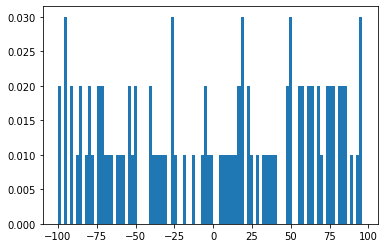

In [10]:
import random
import numpy as np
import matplotlib.pyplot as mp

s = np.random.randint(low=-100, high=100, size=(100), dtype=int)
xmax = np.max(s)
xmin = np.min(s)
m = 100
bin = (xmax - xmin)/m
n = np.size(s)
h = np.zeros(m)
for i in range(n):
    b = int(np.floor((s[i] - xmin)/bin))
    if b==m:
      b =b-1
    h[b] = h[b] + (1/n)

x = np.array([xmin+bin*i for i in range(m)])
mp.bar(x,h,width=bin)


<BarContainer object of 100 artists>

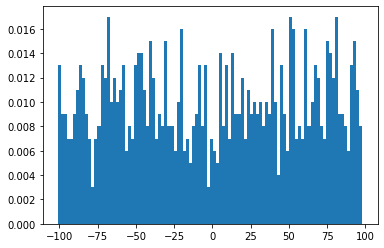

In [8]:
import random
import numpy as np
import matplotlib.pyplot as mp

s = np.random.randint(low=-100, high=100, size=(1000), dtype=int)
xmax = np.max(s)
xmin = np.min(s)
m = 100
bin = (xmax - xmin)/m
n = np.size(s)
h = np.zeros(m)
for i in range(n):
    b = int(np.floor((s[i] - xmin)/bin))
    if b==m:
      b =b-1
    h[b] = h[b] + (1/n)

x = np.array([xmin+bin*i for i in range(m)])
mp.bar(x,h,width=bin)


<BarContainer object of 100 artists>

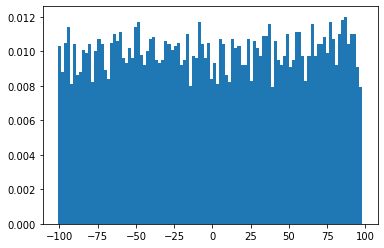

In [6]:
import random
import numpy as np
import matplotlib.pyplot as mp

s = np.random.randint(low=-100, high=100, size=(10000), dtype=int)
xmax = np.max(s)
xmin = np.min(s)
m = 100
bin = (xmax - xmin)/m
n = np.size(s)
h = np.zeros(m)
for i in range(n):
    b = int(np.floor((s[i] - xmin)/bin))
    if b==m:
      b =b-1
    h[b] = h[b] + (1/n)

x = np.array([xmin+bin*i for i in range(m)])
mp.bar(x,h,width=bin)


Question 2

In [11]:
import random
import numpy as np
import matplotlib.pyplot as mp

s = np.random.randint(low=100, high=200, size=(5000), dtype=int)
xmax = np.max(s)
xmin = np.min(s)
m = 400
bin = (xmax - xmin)/m
n = np.size(s)
h = np.zeros(m)
for i in range(n-1):
    b = int(np.floor((s[i] - xmin)/bin))
    if b==m:
      b=b-1
    h[b] = h[b] + (1/n)
    
x = np.array([xmin+bin*i for i in range(m)])
 

#Computing AM
print("Weighted Arithmetic Mean: ",np.average(x,weights=h))

import numpy as np

# Compute weighted GM
weighted_GM = np.exp(np.average(np.log(x),weights=h))
print('Weighted Geometric Mean:',weighted_GM)

# Compute HM
HM = sum(h)/(h*np.reciprocal(x)).sum()
print('Weighted Harmonic Mean:', HM)

# Compute Median
cumulative_sum = np.cumsum(h)
median = x[np.argmax(cumulative_sum >= 0.5)]
print('Weighted Median:', median)

# Compute Mode
mode = x[np.argmax(h)]
print('Weighted Mode:', mode)


Weighted Arithmetic Mean:  149.6005051010202
Weighted Geometric Mean: 146.74029156385294
Weighted Harmonic Mean: 143.84678129077028
Weighted Median: 149.995
Weighted Mode: 110.89


Question 3

In [12]:
import numpy as np

def compute(x,w):
  if all(wi >= 0 for wi in w) and sum(w) != 1:

    # Compute weighted AM
    weighted_AM = np.average(x,weights=w)
    print('Weighted Arithmetic Mean:',weighted_AM)

    # Compute weighted GM
    weighted_GM = np.exp(np.average(np.log(x),weights=w))
    print('Weighted Geometric Mean:',weighted_GM)

    # Compute HM
    HM = sum(h)/(h*np.reciprocal(x)).sum()
    print('Weighted Harmonic Mean:', HM)

    # Compute weighted Median
    n = len(x)
    indx = [i for i in range(n)]
    w = w/np.sum(w)
    for i in range(n):
     for j in range(i+1,n):
       if x[i] > x[j]:
         x[i],x[j] = x[j],x[i]
         indx[i],indx[j] = indx[j],indx[i]

    sumx= 0
    i=0
    while(sumx<0.5):
       sumx = sumx + w[indx[i]]
       i=i+1
    print("Weighted Median is :: ",x[i])

    #Compute weighted Mode
    weighted_mode = x[np.argmax(w)]
    print('Weighted Mode:',weighted_mode)
        
  else:
    print("Invalid dataset: w_i should be non-negative and sum(w) should not be equal to 1")

compute(x,h)

Weighted Arithmetic Mean: 149.6005051010202
Weighted Geometric Mean: 146.74029156385294
Weighted Harmonic Mean: 143.84678129077028
Weighted Median is ::  150.2425
Weighted Mode: 110.89


Question 4(a)

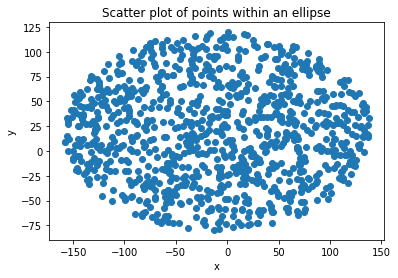

In [13]:
import matplotlib.pyplot as plt
import random
 
mu_x = -10
mu_y = 20
a = 150
b = 100
points = []

for i in range(1000):
    x = random.uniform(mu_x - a, mu_x + a)
    y = random.uniform(mu_y - b, mu_y + b)
    while (x - mu_x)**2/a**2 + (y - mu_y)**2/b**2 > 1:
        x = random.uniform(mu_x - a, mu_x + a)
        y = random.uniform(mu_y - b, mu_y + b)
    points.append([x, y])
 
x, y = zip(*points)
 
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of points within an ellipse')
 
plt.show()


Question 4(b)

In [14]:
import numpy as np

n = 1000
r = 100
xc = np.array([-1, 2, -1, 0, 0, 0, 3, 4, 9, 0])

points = []
for i in range(n):
    x = np.random.randn(10)
    # Normalize the point
    x = x / np.linalg.norm(x)
    # Scale the point
    x = x * r
    # Translate the point
    x = x + xc
    points.append(x)
print(np.shape(points))

(1000, 10)


Question 4(c)

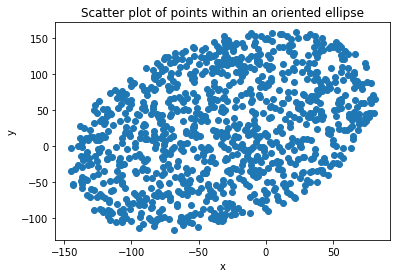

(1000, 2)


In [15]:
import matplotlib.pyplot as plt
import random
import numpy as np

mu_x = -10
mu_y = 20
a = 150
b = 100
theta = np.pi/3
points = []
R = [[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]

for i in range(1000):
    x = random.uniform(mu_x - a, mu_x + a)
    y = random.uniform(mu_y - b, mu_y + b)
    while (x - mu_x)**2/a**2 + (y - mu_y)**2/b**2 > 1:
        x = random.uniform(mu_x - a, mu_x + a)
        y = random.uniform(mu_y - b, mu_y + b)
    point = np.array([x, y])
    point = np.matmul(R, point)
    point = point + [mu_x, mu_y]
    points.append(point)

x, y = zip(*points)

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of points within an oriented ellipse')

plt.show()
print(np.shape(points))


Question 5

k=3
N = 100

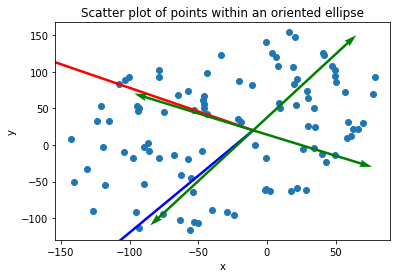

In [23]:
import matplotlib.pyplot as plt
import random
import numpy as np

mu_x = -10
mu_y = 20
a = 150
b = 100
theta = np.pi/3
points = []
R = [[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]

# Generate points within oriented ellipse
for i in range(100):
    x = random.uniform(mu_x - a, mu_x + a)
    y = random.uniform(mu_y - b, mu_y + b)
    while (x - mu_x)**2/a**2 + (y - mu_y)**2/b**2 > 1:
        x = random.uniform(mu_x - a, mu_x + a)
        y = random.uniform(mu_y - b, mu_y + b)
    point = np.array([x, y])
    point = np.matmul(R, point)
    point = point + [mu_x, mu_y]
    points.append(point)

# Plot the points
x, y = zip(*points)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of points within an oriented ellipse')


# Compute covariance matrix and its eigenvectors
mean_vector = np.mean(points, axis=0)
matrix_centered = points - mean_vector
C = (1/len(points)) * np.dot(matrix_centered.T, matrix_centered)
u, s, vh = np.linalg.svd(points - np.mean(points, axis=0))
eigenvectors = vh.T

# Plot eigenvectors and oriented ellipse axes for N = 1000
k = 3
eigenvector_1 = eigenvectors[:, 0]
eigenvector_2 = eigenvectors[:, 1]
plt.quiver(mu_x, mu_y, k*s[0]*eigenvector_1[0], k*s[0]*eigenvector_1[1], angles='xy', scale_units='xy', scale=1, color='blue')
plt.quiver(mu_x, mu_y, k*s[1]*eigenvector_2[0], k*s[1]*eigenvector_2[1], angles='xy', scale_units='xy', scale=1, color='red')
plt.quiver(mu_x, mu_y, a*np.cos(theta), a*np.sin(theta), angles='xy', scale_units='xy', scale=1, color='green')
plt.quiver(mu_x, mu_y, -a*np.cos(theta), -a*np.sin(theta), angles='xy', scale_units='xy', scale=1, color='green')
plt.quiver(mu_x, mu_y, -b*np.sin(theta), b*np.cos(theta), angles='xy', scale_units='xy', scale=1, color='green')
plt.quiver(mu_x, mu_y, b*np.sin(theta), -b*np.cos(theta), angles='xy', scale_units='xy', scale=1, color='green')
plt.show()

K= 4
N= 1000

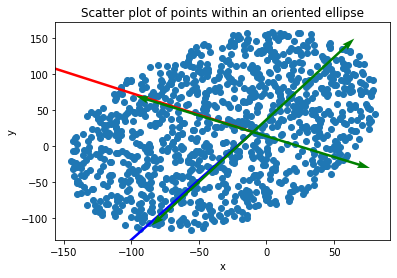

In [24]:
# Generate points within oriented ellipse
for i in range(1000):
    x = random.uniform(mu_x - a, mu_x + a)
    y = random.uniform(mu_y - b, mu_y + b)
    while (x - mu_x)**2/a**2 + (y - mu_y)**2/b**2 > 1:
        x = random.uniform(mu_x - a, mu_x + a)
        y = random.uniform(mu_y - b, mu_y + b)
    point = np.array([x, y])
    point = np.matmul(R, point)
    point = point + [mu_x, mu_y]
    points.append(point)

# Plot the points
x, y = zip(*points)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of points within an oriented ellipse')


# Compute covariance matrix and its eigenvectors
mean_vector = np.mean(points, axis=0)
matrix_centered = points - mean_vector
C = (1/len(points)) * np.dot(matrix_centered.T, matrix_centered)
u, s, vh = np.linalg.svd(points - np.mean(points, axis=0))
eigenvectors = vh.T

# Plot eigenvectors and oriented ellipse axes for N = 1000
k = 4
eigenvector_1 = eigenvectors[:, 0]
eigenvector_2 = eigenvectors[:, 1]
plt.quiver(mu_x, mu_y, k*s[0]*eigenvector_1[0], k*s[0]*eigenvector_1[1], angles='xy', scale_units='xy', scale=1, color='blue')
plt.quiver(mu_x, mu_y, k*s[1]*eigenvector_2[0], k*s[1]*eigenvector_2[1], angles='xy', scale_units='xy', scale=1, color='red')
plt.quiver(mu_x, mu_y, a*np.cos(theta), a*np.sin(theta), angles='xy', scale_units='xy', scale=1, color='green')
plt.quiver(mu_x, mu_y, -a*np.cos(theta), -a*np.sin(theta), angles='xy', scale_units='xy', scale=1, color='green')
plt.quiver(mu_x, mu_y, -b*np.sin(theta), b*np.cos(theta), angles='xy', scale_units='xy', scale=1, color='green')
plt.quiver(mu_x, mu_y, b*np.sin(theta), -b*np.cos(theta), angles='xy', scale_units='xy', scale=1, color='green')
plt.show()

k = 5
N = 1000

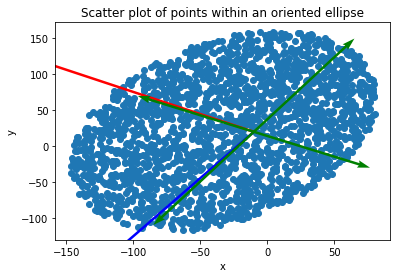

In [25]:
# Generate points within oriented ellipse
for i in range(1000):
    x = random.uniform(mu_x - a, mu_x + a)
    y = random.uniform(mu_y - b, mu_y + b)
    while (x - mu_x)**2/a**2 + (y - mu_y)**2/b**2 > 1:
        x = random.uniform(mu_x - a, mu_x + a)
        y = random.uniform(mu_y - b, mu_y + b)
    point = np.array([x, y])
    point = np.matmul(R, point)
    point = point + [mu_x, mu_y]
    points.append(point)

# Plot the points
x, y = zip(*points)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of points within an oriented ellipse')


# Compute covariance matrix and its eigenvectors
mean_vector = np.mean(points, axis=0)
matrix_centered = points - mean_vector
C = (1/len(points)) * np.dot(matrix_centered.T, matrix_centered)
u, s, vh = np.linalg.svd(points - np.mean(points, axis=0))
eigenvectors = vh.T

# Plot eigenvectors and oriented ellipse axes for N = 1000
k = 5
eigenvector_1 = eigenvectors[:, 0]
eigenvector_2 = eigenvectors[:, 1]
plt.quiver(mu_x, mu_y, k*s[0]*eigenvector_1[0], k*s[0]*eigenvector_1[1], angles='xy', scale_units='xy', scale=1, color='blue')
plt.quiver(mu_x, mu_y, k*s[1]*eigenvector_2[0], k*s[1]*eigenvector_2[1], angles='xy', scale_units='xy', scale=1, color='red')
plt.quiver(mu_x, mu_y, a*np.cos(theta), a*np.sin(theta), angles='xy', scale_units='xy', scale=1, color='green')
plt.quiver(mu_x, mu_y, -a*np.cos(theta), -a*np.sin(theta), angles='xy', scale_units='xy', scale=1, color='green')
plt.quiver(mu_x, mu_y, -b*np.sin(theta), b*np.cos(theta), angles='xy', scale_units='xy', scale=1, color='green')
plt.quiver(mu_x, mu_y, b*np.sin(theta), -b*np.cos(theta), angles='xy', scale_units='xy', scale=1, color='green')
plt.show()


Observations:

As the number of points plotted increases, the eigenvectors that are plotted will converge to the major and minor axes of the oriented ellipse. This is because the eigenvectors are the principal axes of the data, and as the number of data points increases, the estimated principal axes will converge to the true principal axes of the distribution.
      Additionally, with more points plotted, the scatter plot will appear more dense and the eigenvectors will be better aligned with the axes of the oriented ellipse.